## Exploratory Data Analysis on Automobile Dataset

### 1. Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: improve plot clarity
sns.set(style="whitegrid")

### 2. Load Dataset

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

columns = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors",
           "body-style","drive-wheels","engine-location","wheel-base","length","width","height",
           "curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system",
           "bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg",
           "price"]

df = pd.read_csv(url, names=columns)
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### 3. Data Cleaning

In [6]:
# Replace missing values
df.replace("?", np.nan, inplace=True)

# Remove rows without price
df.dropna(subset=["price"], inplace=True)

# Convert key columns to numeric
numeric_cols = ["horsepower", "engine-size", "city-mpg", "highway-mpg", 
                "curb-weight", "price", "bore", "stroke", "compression-ratio"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df.dropna().reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

### 4. Summary Statistics

In [7]:
df.describe()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,26.522013,32.081761,11445.729560
std,1.193086,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,6.097142,6.459189,5877.856195
min,-2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,23.000000,28.000000,7372.000000
50%,1.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,26.000000,32.000000,9233.000000
75%,2.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,31.000000,37.000000,14719.500000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,49.000000,54.000000,35056.000000


### 📊 5. COMBINED VISUALIZATIONS SECTION

#### 5.1 Engine Size vs Price

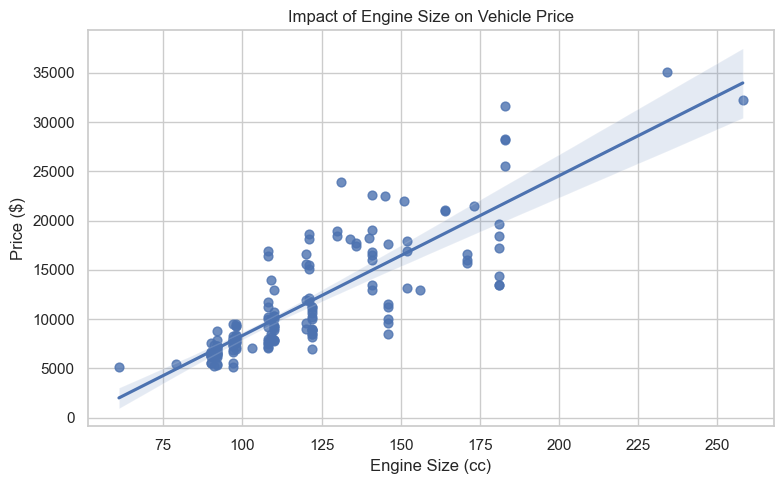

In [8]:
plt.figure(figsize=(8,5))
sns.regplot(data=df, x="engine-size", y="price", scatter_kws={"s":40})
plt.title("Impact of Engine Size on Vehicle Price")
plt.xlabel("Engine Size (cc)")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


#### 5.2 Horsepower vs Fuel Efficiency

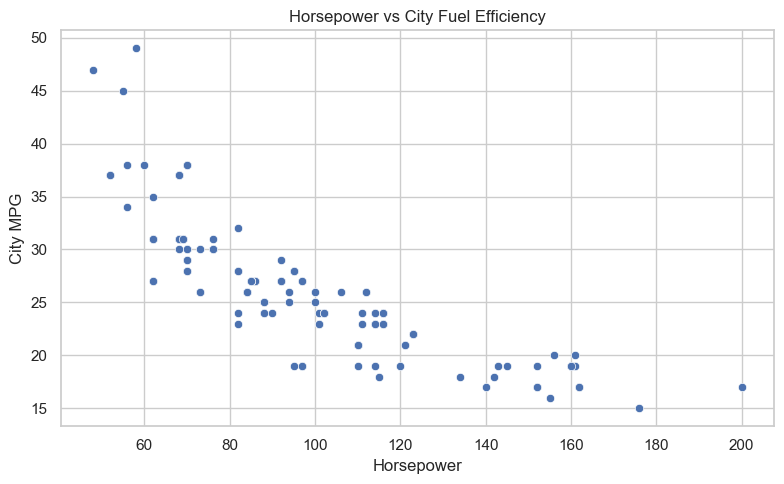

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="horsepower", y="city-mpg")
plt.title("Horsepower vs City Fuel Efficiency")
plt.xlabel("Horsepower")
plt.ylabel("City MPG")
plt.tight_layout()
plt.show()


#### 5.3 Curb Weight vs Engine Size

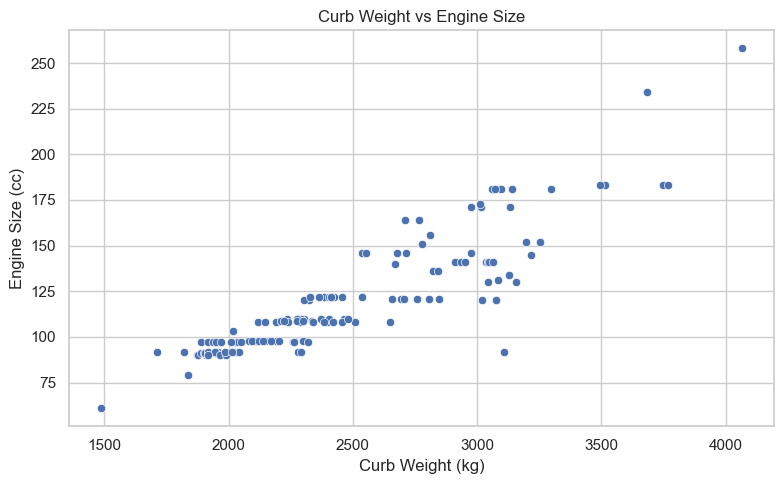

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="curb-weight", y="engine-size")
plt.title("Curb Weight vs Engine Size")
plt.xlabel("Curb Weight (kg)")
plt.ylabel("Engine Size (cc)")
plt.tight_layout()
plt.show()


#### 5.4 Price Distribution by Body Style

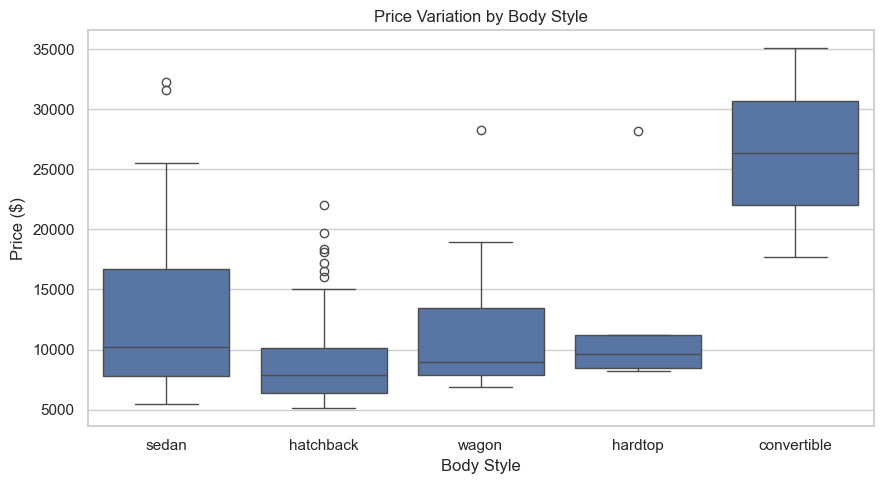

In [11]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df, x="body-style", y="price")
plt.title("Price Variation by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


#### 5.5 Average Price by Fuel Type

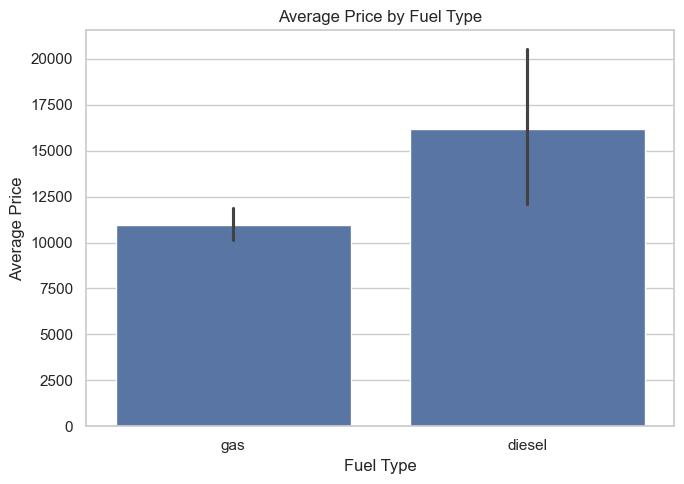

In [12]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="fuel-type", y="price", estimator="mean")
plt.title("Average Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()


#### 5.6 Correlation Heatmap

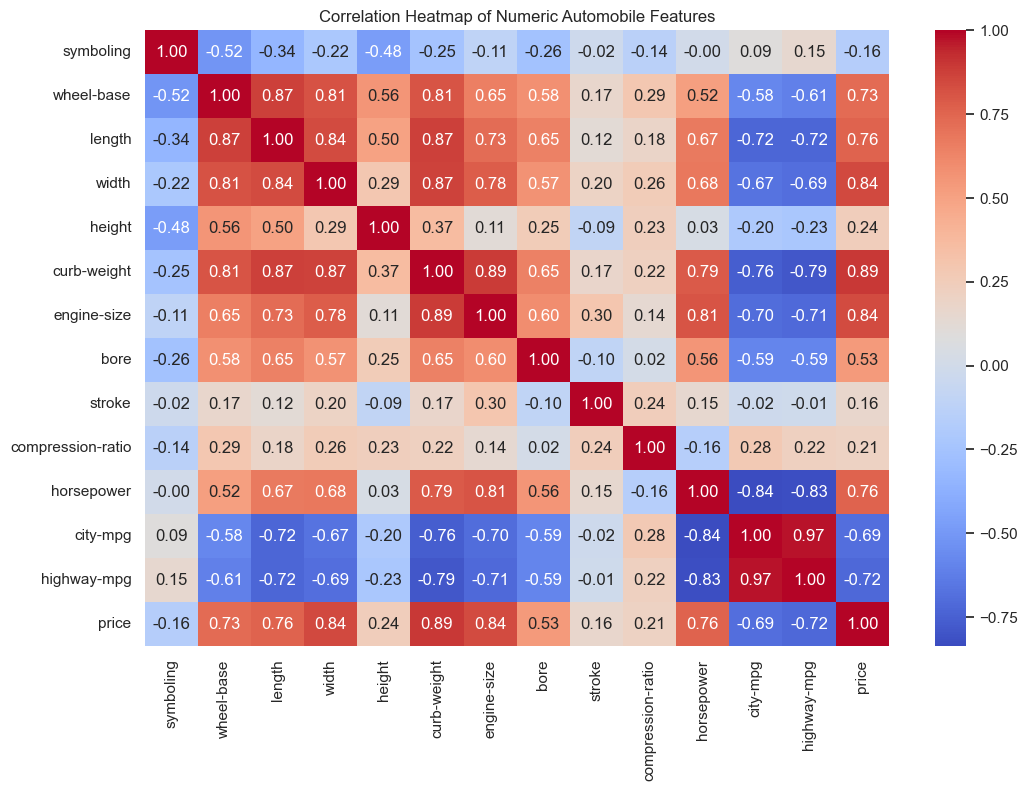

In [15]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Automobile Features")
plt.show()


### 📝 6. Key Findings

🔧 **1. Engine size has a strong positive correlation with price.**  
Larger engines require more complex machining, stronger materials, and stricter tolerances → higher production cost.

🚗 **2. Higher horsepower reduces fuel efficiency.**  
This tradeoff is central to balancing performance vs emissions.

⚙️ **3. Heavier cars often use larger engines.**  
Production engineers must match powertrain capability with vehicle mass for optimal drivability.

🏎️ **4. Body style heavily influences car price.**  
Convertibles and hardtops require more structural reinforcement and precision manufacturing.

⛽ **5. Diesel vehicles tend to be more expensive.**  
Due to high-compression engine design and stronger components.

📈 **6. Correlation heatmap shows engine-size, horsepower, and curb-weight as main price drivers.**  
These factors directly tie to material cost, manufacturing effort, and component complexity.